## แสดงผลเชิงกราฟิกของ bias-variance trade-off เราอาจใช้กราฟเส้นแสดงการเปลี่ยนแปลงของค่า training error และ testing error เมื่อเปลี่ยนค่าพารามิเตอร์ของโมเดล:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Step 1: Generate synthetic data

In [5]:
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.dot(X, np.random.randn(10)) + np.random.normal(0, 0.1, 100)

y

array([-0.51629228, -0.9838826 , -0.48929898, -1.30248099,  0.14463756,
        0.54850988, -0.0726331 ,  0.52703418, -2.62113948, -0.90104983,
       -1.19088516, -1.41469765,  0.51167516, -1.55666929, -1.89688643,
       -0.78330548,  0.01419458, -0.39874582, -0.73098605, -1.3021529 ,
       -1.70058318, -0.9519933 , -2.07225863, -0.65323065, -0.7765864 ,
       -0.40280274, -1.553701  , -2.30493405, -1.0867533 , -0.76484723,
       -0.02373952, -2.17599454, -1.55501661, -1.30018225, -1.99086599,
       -1.65352655, -1.57758175, -0.75644808, -0.44661414, -0.11977501,
       -1.07103341, -1.12632665, -1.45117738, -1.40163626, -0.96336748,
       -2.50972326, -0.77372333, -1.1870775 , -1.44077248, -0.020028  ,
       -1.00278672, -0.79795046, -1.07465561, -1.39940755, -0.71865166,
       -1.56359006, -1.01860352, -2.09453133, -1.21592969, -1.10600484,
       -0.20624765, -0.69824082, -0.393009  , -1.28585151,  0.51056022,
       -2.42602468, -1.91957074, -0.4236805 , -1.19789246, -1.32

### Step 2: Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Define a range of alpha values (complexity parameter)

In [7]:
alphas = np.logspace(-4, 4, 50)
alphas

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

### Step 4: Initialize lists to store errors

In [8]:
train_errors = []
test_errors = []

### Step 5: Train Ridge Regression models with different alpha values and compute errors

In [9]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

### Step 6: Plot the results

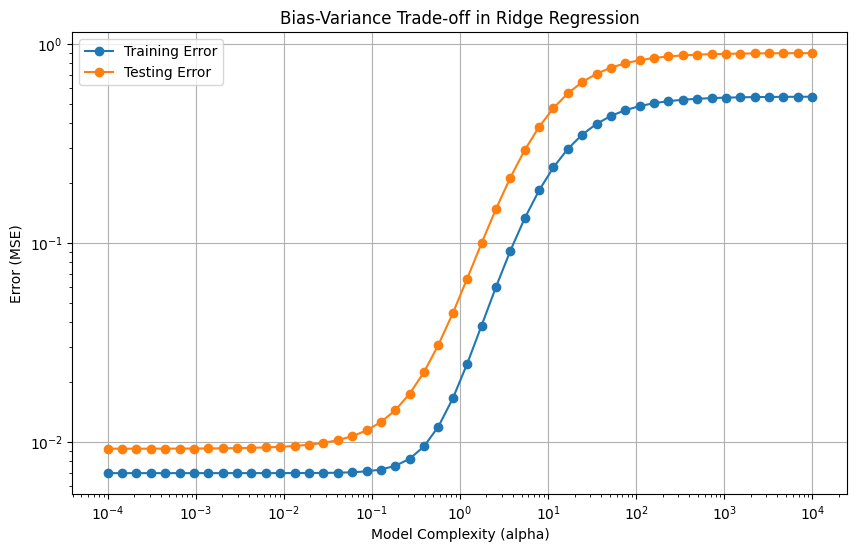

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training Error', marker='o')
plt.plot(alphas, test_errors, label='Testing Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Model Complexity (alpha)')
plt.ylabel('Error (MSE)')
plt.title('Bias-Variance Trade-off in Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

1. แกนนอน (x-axis) แสดงค่าความซับซ้อนของโมเดล (alpha)
2. แกนตั้ง (y-axis) แสดงค่า MSE (mean squared error) ซึ่งใช้วัดความผิดพลาดของโมเดล
3. เส้นสีน้ำเงินแสดง training error ซึ่งมักจะลดลงเมื่อค่าความซับซ้อนของโมเดลเพิ่มขึ้น (ลด bias)
4. เส้นสีส้มแสดง testing error ซึ่งมักจะลดลงถึงจุดหนึ่งแล้วเพิ่มขึ้นอีกเมื่อโมเดลเริ่ม overfit (เพิ่ม variance)